<h2>Data Cleaning

<h3> YouTube Video Stats

In [9]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the file you'd like to load
file_path = "CAvideos.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "datasnaek/youtube-new",
  file_path,

)

print("First 5 records:", df.head())

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_2081/3347675017.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:       video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"

In [5]:
# Drop full duplicate rows
df = df.drop_duplicates()
print("✅ After duplicate removal:", df.shape)

# Drop rows with missing critical text fields
df = df.dropna(subset=["title", "description"])
print("✅ After dropping rows with missing title/description:", df.shape)


✅ After duplicate removal: (40881, 16)
✅ After dropping rows with missing title/description: (39585, 16)


In [7]:
import re

# Define a basic set of English stopwords
stop = set([
    "the", "and", "is", "in", "to", "of", "a", "for", "on", "with", "as", "by", "at", "an", "be", "this", "that", "it", "from", "or"
])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#[\w_]+", " ", text)       # URLs, mentions, hashtags
    text = re.sub(r"[^a-z\s]", "", text)                           # Remove punctuation, numbers
    text = re.sub(r"\s+", " ", text).strip()                       # Remove extra whitespace
    return " ".join([word for word in text.split() if word not in stop])

# Clean title and description separately
df["clean_title"] = df["title"].apply(clean_text)
df["clean_description"] = df["description"].apply(clean_text)

# Remove rows where both title and description are empty
df = df[(df["clean_title"].str.strip() != "") | (df["clean_description"].str.strip() != "")]
print("✅ After removing empty cleaned text rows:", df.shape)


✅ After removing empty cleaned text rows: (39347, 18)


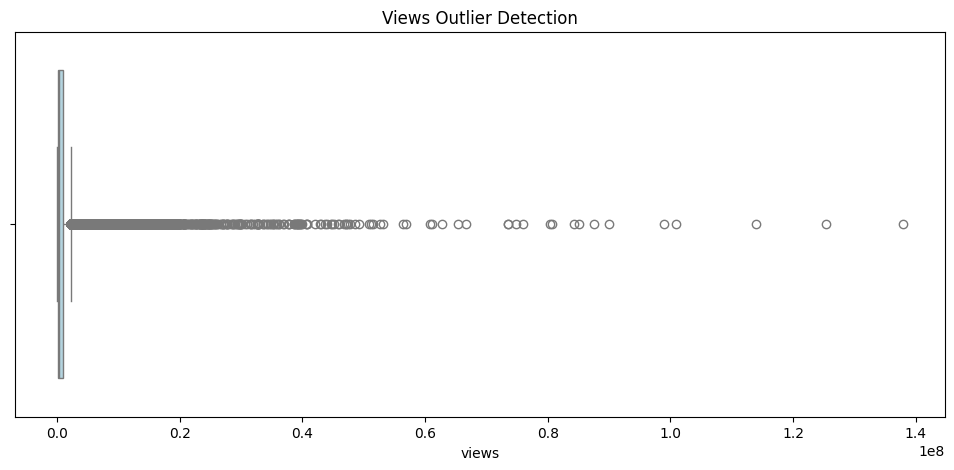

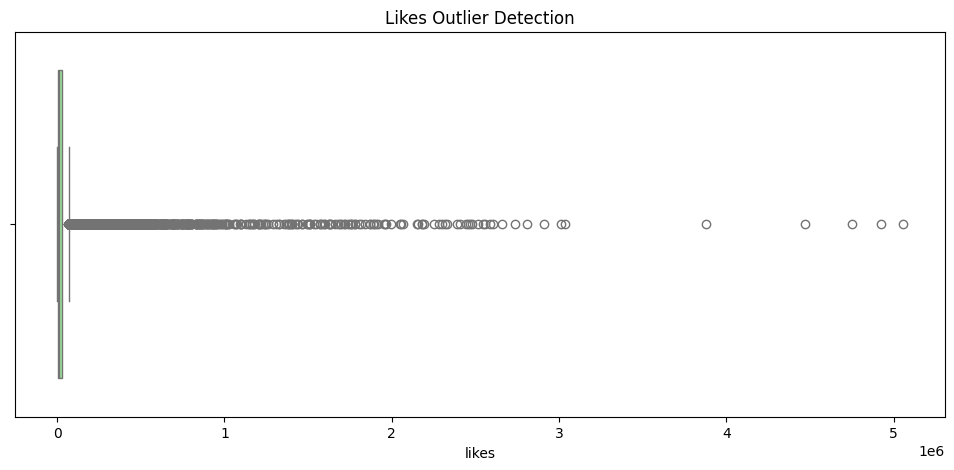

✅ After removing views outliers: (36417, 16)


In [10]:
# Visualize views and likes
plt.figure(figsize=(12,5))
sns.boxplot(x=df["views"], color='lightblue')
plt.title("Views Outlier Detection")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df["likes"], color='lightgreen')
plt.title("Likes Outlier Detection")
plt.show()

# Outlier filtering using IQR for views
Q1 = df["views"].quantile(0.25)
Q3 = df["views"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["views"] >= Q1 - 1.5 * IQR) & (df["views"] <= Q3 + 1.5 * IQR)]
print("✅ After removing views outliers:", df.shape)


In [12]:
print("✅ Final dataset shape:", df.shape)
print("🔍 Sample cleaned data:")

# Only select columns that exist in the DataFrame
cols = [col for col in ["clean_title", "clean_description", "views", "likes"] if col in df.columns]
print(df[cols].sample(5))

# Optional save
df.to_csv("cleaned_CA_youtube.csv", index=False)


✅ Final dataset shape: (36417, 16)
🔍 Sample cleaned data:
         views  likes
4550    298142   7210
34542   792564   5803
10733   207200   2897
36816  1176916  23383
29612   474275  80106
